# Greek Digits Classification

##### Getting data from Kaggle

In [ ]:
 ! pip install -q kaggle

In [ ]:
 from google.colab import files

In [ ]:
files.upload()

{}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!mv ./kaggle.json ~/.kaggle/

mv: cannot stat './kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d guru001/hasyv2

 99% 142M/143M [00:03<00:00, 41.5MB/s]
100% 143M/143M [00:04<00:00, 37.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('hasyv2.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!rm ./hasyv2.zip

In [ ]:
!rm -r ./hasyv2

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder

In [2]:
symbols = pd.read_csv('symbols.csv')
symbols.head()

,symbol_id,latex,training_samples,test_samples
0,31,A,137,22
1,32,B,53,8
2,33,C,120,14
3,34,D,50,8
4,35,E,48,6


In [3]:
symbols['latex'].nunique()

369

In [4]:
symbols.T

,0,1,2,3,4,5,6,7,8,9,...,359,360,361,362,363,364,365,366,367,368
symbol_id,31,32,33,34,35,36,37,38,39,40,...,1317,1369,1371,1374,1382,1385,1394,1395,1396,1400
latex,A,B,C,D,E,F,G,H,I,J,...,\mathbb{H},\ss,\aa,\L,\AA,\O,\o,\ae,\AE,\guillemotleft
training_samples,137,53,120,50,48,50,106,57,90,93,...,64,215,207,89,682,213,282,257,134,96
test_samples,22,8,14,8,6,6,12,7,10,11,...,8,25,24,10,76,24,32,29,15,11


In [5]:
greek_symbols = [r'\alpha', r'\rho', r'\beta', r'\gamma', r'\Delta', r'\delta', r'\epsilon', r'\zeta', r'\eta', r'\Theta', r'\theta', r'\iota', r'\kappa', r'\Lambda', r'\lambda', r'\mu', r'\nu', r'\Xi', r'\xi', r'\Pi', r'\pi', r'\varpi', r'\Sigma', r'\sigma', r'\tau', r'\Phi', r'\phi', r'\varphi', r'\chi', r'\Psi', r'\psi', r'\Omega', r'\omega']
len(greek_symbols)

33

In [6]:
symbols[symbols['latex'].isin(greek_symbols)].sort_values(by='training_samples')

,symbol_id,latex,training_samples,test_samples
248,838,\varpi,131,15
78,159,\iota,140,16
79,160,\kappa,225,26
84,165,\nu,352,39
86,167,\Xi,357,41
90,171,\tau,380,44
82,163,\Lambda,396,45
96,179,\Psi,402,46
75,156,\Theta,414,47
76,157,\epsilon,489,55


In [7]:
greek_symbols_chart = symbols[symbols['latex'].isin(greek_symbols)]
greek_symbols_chart['test_samples'].sort_values()

248     15
78      16
79      26
84      39
86      41
90      44
82      45
96      46
75      47
76      55
95      57
92      62
97      63
74      66
73      69
91      69
88      69
87      81
98      83
72      87
94      94
71     100
81     101
41     113
39     113
68     114
83     115
70     125
93     152
37     159
67     192
85     257
38     260
Name: test_samples, dtype: int64

In [8]:
train_data_labels = pd.read_csv('classification-task/fold-1/train.csv')
test_data_labels = pd.read_csv('classification-task/fold-1/test.csv')
for i in range(2,11):
    train_data_labels = pd.concat([train_data_labels,pd.read_csv('classification-task/fold-' + str(i) + '/train.csv')] , ignore_index=True)
    test_data_labels = pd.concat([test_data_labels,pd.read_csv('classification-task/fold-' + str(i) + '/test.csv')] , ignore_index=True)

print(train_data_labels.shape)
print(test_data_labels.shape)
train_data_labels.head()

(1514097, 4)
(168233, 4)


,path,symbol_id,latex,user_id
0,../../hasy-data/v2-00016.png,31,A,8071
1,../../hasy-data/v2-00017.png,31,A,9505
2,../../hasy-data/v2-00018.png,31,A,16925
3,../../hasy-data/v2-00019.png,31,A,16925
4,../../hasy-data/v2-00020.png,31,A,16925


In [9]:
greek_train_data_labels = train_data_labels[train_data_labels['symbol_id'].isin(greek_symbols_chart['symbol_id'])]
print("Train Data")
print("Unique Check " , greek_train_data_labels['symbol_id'].nunique())
print("Shape ", greek_train_data_labels.shape)
greek_train_data_labels.head()

Train Data
Unique Check  33
Shape  (265599, 4)


,path,symbol_id,latex,user_id
17,../../hasy-data/v2-00603.png,81,\pi,16925
18,../../hasy-data/v2-00604.png,81,\pi,16925
19,../../hasy-data/v2-00605.png,81,\pi,16925
20,../../hasy-data/v2-00606.png,81,\pi,16925
21,../../hasy-data/v2-00607.png,81,\pi,16925


In [10]:
greek_test_data_labels = test_data_labels[test_data_labels['symbol_id'].isin(greek_symbols_chart['symbol_id'])]
print("Test Data")
print("Unique Check " , greek_test_data_labels['symbol_id'].nunique())
print("Shape ", greek_test_data_labels.shape)
greek_test_data_labels.head()

Test Data
Unique Check  33
Shape  (29511, 4)


,path,symbol_id,latex,user_id
432,../../hasy-data/v2-00449.png,81,\pi,1692
433,../../hasy-data/v2-00450.png,81,\pi,1710
434,../../hasy-data/v2-00451.png,81,\pi,5822
435,../../hasy-data/v2-00452.png,81,\pi,6483
436,../../hasy-data/v2-00453.png,81,\pi,8324


In [11]:
greek_train_data_labels['path'] = greek_train_data_labels['path'].str[6:]
greek_test_data_labels['path'] = greek_test_data_labels['path'].str[6:]
greek_train_data_labels.head()

<ipython-input-11-e0ab1965d1e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greek_train_data_labels['path'] = greek_train_data_labels['path'].str[6:]
<ipython-input-11-e0ab1965d1e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greek_test_data_labels['path'] = greek_test_data_labels['path'].str[6:]


,path,symbol_id,latex,user_id
17,hasy-data/v2-00603.png,81,\pi,16925
18,hasy-data/v2-00604.png,81,\pi,16925
19,hasy-data/v2-00605.png,81,\pi,16925
20,hasy-data/v2-00606.png,81,\pi,16925
21,hasy-data/v2-00607.png,81,\pi,16925


### Seeing sample examples

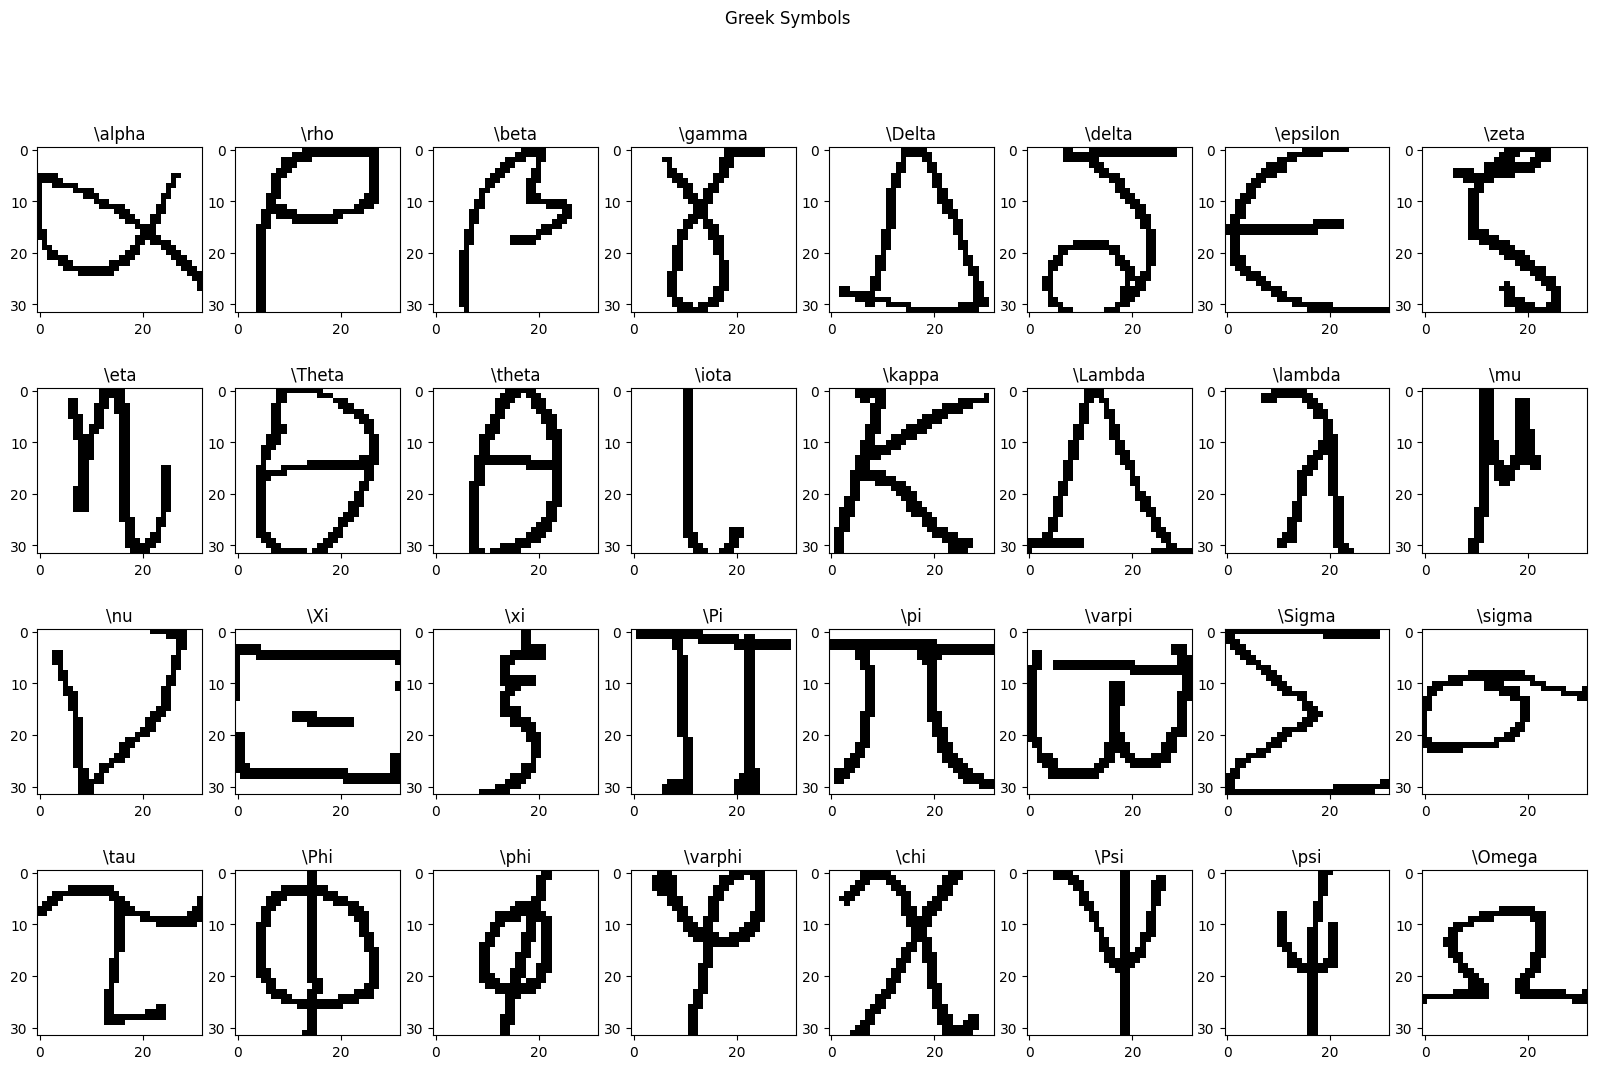

In [12]:
fig, ax = plt.subplots(4,8, figsize=(20,12))
fig.suptitle('Greek Symbols')
random_num = 12
k = 0
for i in range(4):
  for j in range(8):
    label = greek_symbols[k]
    ax[i][j].set_title(label)
    ax[i][j].imshow(plt.imread(greek_train_data_labels[greek_train_data_labels['latex']==label]['path'].iloc[random_num]))
    k+=1

In [13]:
plt.imread(greek_train_data_labels['path'].values[0]).dtype

dtype('float32')

In [14]:
plt.imread(greek_train_data_labels['path'].values[0]).shape

(32, 32, 3)

In [15]:
labels = {}
k = 0
for label in greek_train_data_labels['latex'].unique():
  labels[label] = k
  k+=1
labels

{'\\pi': 0,
 '\\Sigma': 1,
 '\\lambda': 2,
 '\\Xi': 3,
 '\\Pi': 4,
 '\\tau': 5,
 '\\Phi': 6,
 '\\chi': 7,
 '\\Psi': 8,
 '\\alpha': 9,
 '\\beta': 10,
 '\\sigma': 11,
 '\\gamma': 12,
 '\\delta': 13,
 '\\Delta': 14,
 '\\zeta': 15,
 '\\eta': 16,
 '\\theta': 17,
 '\\Theta': 18,
 '\\epsilon': 19,
 '\\iota': 20,
 '\\kappa': 21,
 '\\Lambda': 22,
 '\\mu': 23,
 '\\nu': 24,
 '\\xi': 25,
 '\\rho': 26,
 '\\phi': 27,
 '\\varphi': 28,
 '\\psi': 29,
 '\\omega': 30,
 '\\Omega': 31,
 '\\varpi': 32}

In [16]:
greek_train_data_labels['encode_label'] = greek_train_data_labels['latex'].map(labels)
greek_test_data_labels['encode_label'] = greek_test_data_labels['latex'].map(labels)
print(greek_test_data_labels.shape)
print(greek_train_data_labels.shape)
greek_train_data_labels

(29511, 5)
(265599, 5)


<ipython-input-16-79f5234e1321>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greek_train_data_labels['encode_label'] = greek_train_data_labels['latex'].map(labels)
<ipython-input-16-79f5234e1321>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greek_test_data_labels['encode_label'] = greek_test_data_labels['latex'].map(labels)


,path,symbol_id,latex,user_id,encode_label
17,hasy-data/v2-00603.png,81,\pi,16925,0
18,hasy-data/v2-00604.png,81,\pi,16925,0
19,hasy-data/v2-00605.png,81,\pi,16925,0
20,hasy-data/v2-00606.png,81,\pi,16925,0
21,hasy-data/v2-00607.png,81,\pi,16925,0
...,...,...,...,...,...
1471829,hasy-data/v2-120717.png,838,\varpi,16925,32
1471830,hasy-data/v2-120718.png,838,\varpi,16925,32
1471831,hasy-data/v2-120719.png,838,\varpi,16925,32
1471832,hasy-data/v2-120720.png,838,\varpi,16925,32


In [17]:
X_train = []
rows_to_delete = []

for index, row in greek_train_data_labels.iterrows():
    image_path = row['path']
    img_arr = cv2.imread("./" + str(image_path), 0)
    if img_arr is None:
        rows_to_delete.append(index)
        continue

    img_arr = cv2.resize(img_arr, (32, 32))
    img_arr = img_arr / 255
    X_train.append(img_arr)

greek_train_data_labels.drop(rows_to_delete, inplace=True)

X_train = np.array(X_train)
X_train.shape

<ipython-input-17-b4761d4c6446>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greek_train_data_labels.drop(rows_to_delete, inplace=True)


(265599, 32, 32)

In [18]:
X_test = []
rows_to_delete = []

for index, row in greek_test_data_labels.iterrows():
    image_path = row['path']
    img_arr = cv2.imread("./" + str(image_path), 0)
    if img_arr is None:
        rows_to_delete.append(index)
        continue

    img_arr = cv2.resize(img_arr, (32, 32))
    img_arr = img_arr / 255
    X_test.append(img_arr)

greek_test_data_labels.drop(rows_to_delete, inplace=True)

X_test = np.array(X_test)
X_test.shape

<ipython-input-18-b40010c75a0f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greek_test_data_labels.drop(rows_to_delete, inplace=True)


(29511, 32, 32)

In [19]:
y_train = pd.get_dummies(greek_train_data_labels['encode_label'])
y_test = pd.get_dummies(greek_test_data_labels['encode_label'])
print(y_train.shape)
print(y_test.shape)
y_train.head()

(265599, 33)
(29511, 33)


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y_train = np.array(y_train)
y_test = np.array(y_test)


In [21]:
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

X_train  (265599, 32, 32)
X_test  (29511, 32, 32)
y_train  (265599, 33)
y_test  (29511, 33)


In [22]:
X_train = X_train.reshape(265599, 32, 32, 1)
X_test = X_test.reshape(29511, 32, 32, 1)

In [23]:
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

X_train  (265599, 32, 32, 1)
X_test  (29511, 32, 32, 1)
y_train  (265599, 33)
y_test  (29511, 33)


In [24]:
model = keras.Sequential(
    [
        keras.Input(shape=(32,32,1)),
        layers.Conv2D(64, 3, activation="relu"),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.1),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(100, activation='relu'),
        layers.Dense(33, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                   

In [25]:
batch_size = 2048
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
130/130 [==============================] - 38s 180ms/step - loss: 1.2829 - accuracy: 0.6399
Epoch 2/20
130/130 [==============================] - 22s 166ms/step - loss: 0.3970 - accuracy: 0.8764
Epoch 3/20
130/130 [==============================] - 22s 169ms/step - loss: 0.3059 - accuracy: 0.9019
Epoch 4/20
130/130 [==============================] - 22s 169ms/step - loss: 0.2514 - accuracy: 0.9161
Epoch 5/20
130/130 [==============================] - 22s 169ms/step - loss: 0.2145 - accuracy: 0.9257
Epoch 6/20
130/130 [==============================] - 22s 168ms/step - loss: 0.1879 - accuracy: 0.9331
Epoch 7/20
130/130 [==============================] - 22s 168ms/step - loss: 0.1644 - accuracy: 0.9401
Epoch 8/20
130/130 [==============================] - 22s 169ms/step - loss: 0.1470 - accuracy: 0.9448
Epoch 9/20
130/130 [==============================] - 22s 168ms/step - loss: 0.1323 - accuracy: 0.9498
Epoch 10/20
130/130 [==============================] - 22s 168ms/step - l

In [26]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.018127277493476868
Test accuracy: 0.9954254627227783


In [28]:
# import random

# while(True):
#   k = random.randint(0,3459)
#   result = model.predict(np.array([X_test[k]]))
#   #print(result)

#   predicted_value = np.argmax(result)
#   if(predicted_value != np.argmax(y_test[k])):
#     print(predicted_value)
#     print(np.argmax(y_test[k]))
#     break


In [29]:
# result

In [30]:
# plt.imshow(X_test[k], cmap='gray')

In [31]:
# x = cv2.imread('/content/pixil-frame-0.png', 0)
# x = cv2.resize(x, (32, 32))
# x = x.reshape(1, 32, 32, 1)
# x = np.array(x)
# x = x / 255
# np.argmax(model.predict(x))

In [32]:
from sklearn import metrics

y_pred = np.argmax(model.predict(X_test),axis=-1)
val_labels = np.argmax(y_test, axis=-1)

ls_report = metrics.classification_report(val_labels, y_pred)
print(ls_report)

923/923 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1533
           1       1.00      1.00      1.00      1910
           2       1.00      1.00      1.00       996
           3       1.00      1.00      1.00       398
           4       0.96      0.96      0.96       799
           5       1.00      1.00      1.00       424
           6       1.00      0.96      0.98       607
           7       1.00      1.00      1.00       929
           8       0.98      0.96      0.97       448
           9       1.00      1.00      1.00      2601
          10       1.00      1.00      1.00      1131
          11       1.00      1.00      1.00      1123
          12       1.00      1.00      1.00      1140
          13       1.00      1.00      1.00      1246
          14       1.00      1.00      1.00       996
          15       1.00      1.00      1.00       872
          16       1.00   